Ref : https://youtu.be/_T0l015ecK4

In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('ggplot')

start = dt.datetime(2001, 11, 20)
end = dt.datetime(2017, 11, 20)

prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

In [8]:
returns = prices.pct_change()

last_price = prices[-1]

In [9]:
#Number of Simulations
num_simulations = 1000
num_days = 90

simulation_df = pd.DataFrame()

In [10]:
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 89:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

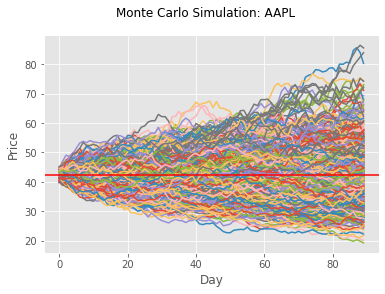

In [11]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()